In [1]:
import time
start = time.time()

from IPython.display import Audio, display

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn.model_selection import cross_val_score

from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import seaborn as sns

In [3]:
def allDone():
  display(Audio('Storm(91).WAV', autoplay=True))

In [4]:
y2015 = pd.read_csv('LoanStats3d.csv', skipinitialspace=True, header=1)

/Users/davidmertenjones/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
y2015.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,68009401,72868139.0,16000.0,16000.0,16000.0,60 months,14.85%,379.39,C,C5,...,0.0,2.0,78.9,0.0,0.0,2.0,298100.0,31329.0,281300.0,13400.0
1,68354783,73244544.0,9600.0,9600.0,9600.0,36 months,7.49%,298.58,A,A4,...,0.0,2.0,100.0,66.7,0.0,0.0,88635.0,55387.0,12500.0,75635.0
2,68466916,73356753.0,25000.0,25000.0,25000.0,36 months,7.49%,777.55,A,A4,...,0.0,0.0,100.0,20.0,0.0,0.0,373572.0,68056.0,38400.0,82117.0
3,68466961,73356799.0,28000.0,28000.0,28000.0,36 months,6.49%,858.05,A,A2,...,0.0,0.0,91.7,22.2,0.0,0.0,304003.0,74920.0,41500.0,42503.0
4,68495092,73384866.0,8650.0,8650.0,8650.0,36 months,19.89%,320.99,E,E3,...,0.0,12.0,100.0,50.0,1.0,0.0,38998.0,18926.0,2750.0,18248.0


In [6]:
y2015.loan_status.value_counts()

Current               287414
Fully Paid             87989
Charged Off            29178
Late (31-120 days)      9510
In Grace Period         4320
Late (16-30 days)       1888
Default                  796
Name: loan_status, dtype: int64

In [7]:
rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status', 1)
Y = y2015['loan_status']

In [8]:
categorical = y2015.select_dtypes(include=['object'])

"""for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())"""

'for i in categorical:\n    column = categorical[i]\n    print(i)\n    print(column.nunique())'

In [9]:
# Convert ID and Interest Rate to numeric.
y2015['id'] = pd.to_numeric(y2015['id'], errors='coerce')
y2015['int_rate'] = pd.to_numeric(y2015['int_rate'].str.strip('%'), errors='coerce')

# Drop other columns with many unique variables
y2015.drop(['url', 'emp_title', 'zip_code', 'earliest_cr_line', 'revol_util',
            'sub_grade', 'addr_state', 'desc'], 1, inplace=True)

In [10]:
y2015 = y2015[:-2]

In [11]:
"""y2015.info(verbose=True)"""

'y2015.info(verbose=True)'

In [12]:
timestep1 = time.time()
print(timestep1 - start)

33.45510482788086


In [13]:
rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status', 1)
Y = y2015['loan_status']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

In [14]:
cvscore = cross_val_score(rfc, X, Y, cv=10)
print('Cross-Validation Score:\n', cvscore)
print('Cross-Validation Mean:\n', cvscore.mean())
print('Cross-Validation +/- (2x STD):\n', (cvscore.std()*2))

Cross-Validation Score:
 [ 0.97976776  0.98064639  0.98133504  0.98183373  0.973308    0.97729755
  0.96079223  0.98057422  0.97924336  0.98043034]
Cross-Validation Mean:
 0.977522862111
Cross-Validation +/- (2x STD):
 0.0121056422873


In [15]:
timestep2 = time.time()
print(timestep2 - timestep1)
print(timestep2 - start)

317.4184682369232
350.8735730648041


# Feature_importances_

In [16]:
importances = list(rfc.fit(X, Y).feature_importances_)

feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(list(X.columns), importances)]

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

for pair in feature_importances:
    print('Variable: {} Importance: {}'.format(*pair)) 

Variable: out_prncp Importance: 0.2756
Variable: last_pymnt_amnt Importance: 0.145
Variable: out_prncp_inv Importance: 0.0906
Variable: last_pymnt_d_Jan-2017 Importance: 0.0856
Variable: total_rec_prncp Importance: 0.0709
Variable: last_credit_pull_d_Jan-2017 Importance: 0.0352
Variable: next_pymnt_d_Feb-2017 Importance: 0.0268
Variable: total_pymnt_inv Importance: 0.0247
Variable: recoveries Importance: 0.0196
Variable: total_pymnt Importance: 0.0186
Variable: last_pymnt_d_Nov-2016 Importance: 0.0149
Variable: last_pymnt_d_Sep-2016 Importance: 0.0148
Variable: last_pymnt_d_Dec-2016 Importance: 0.0141
Variable: last_pymnt_d_Oct-2016 Importance: 0.0139
Variable: funded_amnt_inv Importance: 0.0107
Variable: total_rec_int Importance: 0.0107
Variable: collection_recovery_fee Importance: 0.01
Variable: next_pymnt_d_Jan-2017 Importance: 0.0072
Variable: last_credit_pull_d_Oct-2016 Importance: 0.0064
Variable: int_rate Importance: 0.0058
Variable: installment Importance: 0.0058
Variable: loan

In [17]:
timestep3 = time.time()
print(timestep3 - timestep2)
print(timestep3 - start)

41.36152005195618
392.23509311676025


## Importance: >= 0.01

In [18]:
important_features = []

for i in range(0, len(feature_importances)):
    if feature_importances[i][1] >= 0.01:
        important_features.append(feature_importances[i][0])
        
important_features

['out_prncp',
 'last_pymnt_amnt',
 'out_prncp_inv',
 'last_pymnt_d_Jan-2017',
 'total_rec_prncp',
 'last_credit_pull_d_Jan-2017',
 'next_pymnt_d_Feb-2017',
 'total_pymnt_inv',
 'recoveries',
 'total_pymnt',
 'last_pymnt_d_Nov-2016',
 'last_pymnt_d_Sep-2016',
 'last_pymnt_d_Dec-2016',
 'last_pymnt_d_Oct-2016',
 'funded_amnt_inv',
 'total_rec_int',
 'collection_recovery_fee']

In [19]:
X.loc[:, important_features].corr()

,out_prncp,last_pymnt_amnt,out_prncp_inv,last_pymnt_d_Jan-2017,total_rec_prncp,last_credit_pull_d_Jan-2017,next_pymnt_d_Feb-2017,total_pymnt_inv,recoveries,total_pymnt,last_pymnt_d_Nov-2016,last_pymnt_d_Sep-2016,last_pymnt_d_Dec-2016,last_pymnt_d_Oct-2016,funded_amnt_inv,total_rec_int,collection_recovery_fee
out_prncp,1.000000,-0.371040,0.999997,0.468726,-0.135324,0.425428,0.492122,0.048012,-0.127724,0.048053,-0.076091,-0.071170,0.069258,-0.076796,0.623858,0.684606,-0.128244
last_pymnt_amnt,-0.371040,1.000000,-0.371058,-0.481806,0.817310,-0.516501,-0.499611,0.742462,-0.045958,0.742504,0.100018,0.093274,-0.054781,0.104099,0.259878,-0.005497,-0.045996
out_prncp_inv,0.999997,-0.371058,1.000000,0.468781,-0.135268,0.425446,0.492148,0.048055,-0.127730,0.048092,-0.076104,-0.071188,0.069226,-0.076811,0.623899,0.684557,-0.128250
last_pymnt_d_Jan-2017,0.468726,-0.481806,0.468781,1.000000,-0.319887,0.539752,0.654345,-0.259284,-0.161810,-0.259314,-0.188382,-0.184260,-0.425601,-0.189566,0.015219,0.163577,-0.162469
total_rec_prncp,-0.135324,0.817310,-0.135268,-0.319887,1.000000,-0.381494,-0.341800,0.964892,-0.100933,0.964876,0.101057,0.081862,-0.021320,0.098448,0.556377,0.218788,-0.100695
last_credit_pull_d_Jan-2017,0.425428,-0.516501,0.425446,0.539752,-0.381494,1.000000,0.542588,-0.324175,-0.257685,-0.324184,-0.106327,-0.106383,0.082612,-0.102797,-0.011554,0.153110,-0.260762
next_pymnt_d_Feb-2017,0.492122,-0.499611,0.492148,0.654345,-0.341800,0.542588,1.000000,-0.275656,-0.162650,-0.275667,-0.108818,-0.108201,0.016406,-0.111201,0.017517,0.177712,-0.163312
total_pymnt_inv,0.048012,0.742462,0.048055,-0.259284,0.964892,-0.324175,-0.275656,1.000000,-0.038240,0.999997,0.094170,0.073307,-0.010178,0.089865,0.706239,0.460399,-0.039150
recoveries,-0.127724,-0.045958,-0.127730,-0.161810,-0.100933,-0.257685,-0.162650,-0.038240,1.000000,-0.038244,-0.018554,-0.017341,-0.041968,-0.018493,0.077869,-0.027485,0.973343
total_pymnt,0.048053,0.742504,0.048092,-0.259314,0.964876,-0.324184,-0.275667,0.999997,-0.038244,1.000000,0.094187,0.073318,-0.010146,0.089870,0.706259,0.460466,-0.039152


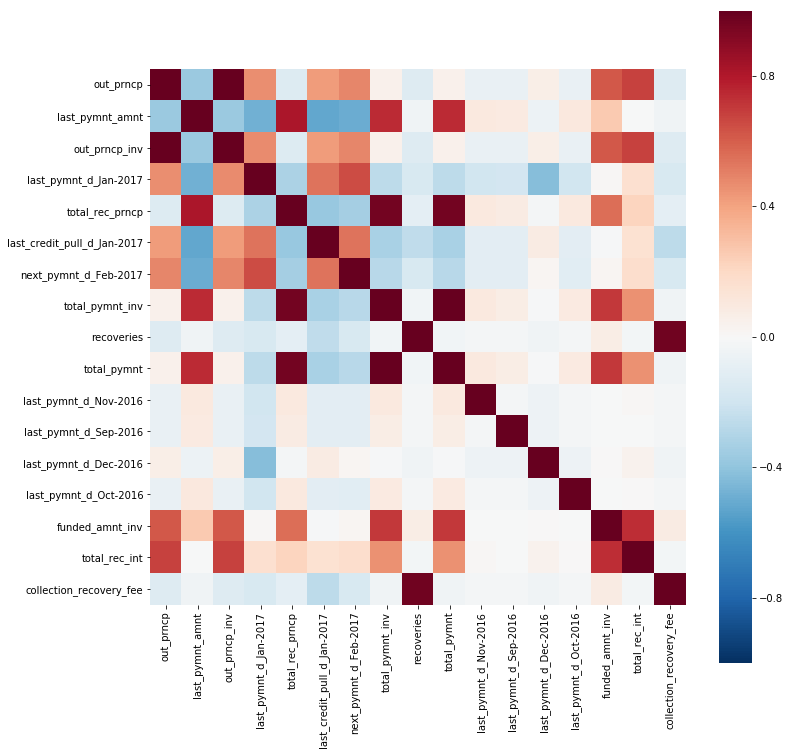

In [20]:
plt.rcParams['figure.figsize'] = 12, 12

sns.heatmap(X.loc[:, important_features].corr(), vmin=-1, vmax=1, square=True, cmap='RdBu_r')

plt.show()

In [21]:
timestep4 = time.time()
print(timestep4 - timestep3)
print(timestep4 - start)

2.5362489223480225
394.7713420391083


In [22]:
features1 = pd.DataFrame(X.loc[:, important_features])

In [23]:
def to_binary(x):
    if x < 0.5:
        return 0
    else:
        return 1

In [24]:
collinear1 = ['last_pymnt_d_Jan-2017', 'out_prncp', 'out_prncp_inv',
              'next_pymnt_d_Feb-2017', 'last_credit_pull_d_Jan-2017']

means = features1[collinear1].mean(axis=0)
stds = features1[collinear1].std(axis=0)
features1['Predictor1'] = ((features1[collinear1] - means) / stds).mean(axis=1)
features1['Predictor1'] = features1['Predictor1'] - features1['Predictor1'].min()
features1['Predictor1'] = features1['Predictor1']/features1['Predictor1'].max()


features1.drop(collinear1, axis=1, inplace=True)

In [26]:
collinear2 = ['last_pymnt_amnt', 'total_rec_prncp', 'total_pymnt_inv',
              'total_pymnt']

means = features1[collinear2].mean(axis=0)
stds = features1[collinear2].std(axis=0)
features1['Predictor2'] = ((features1[collinear2] - means) / stds).mean(axis=1)
features1['Predictor2'] = features1['Predictor2'] - features1['Predictor2'].min()
features1['Predictor2'] = features1['Predictor2']/features1['Predictor2'].max()


features1.drop(collinear2, axis=1, inplace=True)

In [27]:
collinear3 = ['recoveries', 'collection_recovery_fee']

means = features1[collinear3].mean(axis=0)
stds = features1[collinear3].std(axis=0)
features1['Predictor3'] = ((features1[collinear3] - means) / stds).mean(axis=1)
features1['Predictor3'] = features1['Predictor3'] - features1['Predictor3'].min()
features1['Predictor3'] = features1['Predictor3']/features1['Predictor3'].max()


features1.drop(collinear3, axis=1, inplace=True)

In [28]:
importances = list(rfc.fit(features1, Y).feature_importances_)

feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(list(features1.columns), importances)]

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

for pair in feature_importances:
    print('Variable: {} Importance: {}'.format(*pair)) 

Variable: Predictor1 Importance: 0.5746
Variable: Predictor2 Importance: 0.2009
Variable: Predictor3 Importance: 0.0504
Variable: total_rec_int Importance: 0.0498
Variable: funded_amnt_inv Importance: 0.0392
Variable: last_pymnt_d_Nov-2016 Importance: 0.0277
Variable: last_pymnt_d_Oct-2016 Importance: 0.0251
Variable: last_pymnt_d_Sep-2016 Importance: 0.0238
Variable: last_pymnt_d_Dec-2016 Importance: 0.0085


# RFC 3: Combined Features

In [29]:
rfc = ensemble.RandomForestClassifier()
Y = y2015['loan_status']

cvscore = cross_val_score(rfc, features1, Y, cv=10)
print('Cross-Validation Score:\n', cvscore)
print('Cross-Validation Mean:\n', cvscore.mean())
print('Cross-Validation +/- (2x STD):\n', (cvscore.std()*2))

Cross-Validation Score:
 [ 0.95746954  0.97228753  0.97620574  0.97929282  0.96991213  0.97478034
  0.9723812   0.97703579  0.97161992  0.97860162]
Cross-Validation Mean:
 0.972958664041
Cross-Validation +/- (2x STD):
 0.0119032731477


In [30]:
cvscore = cross_val_score(rfc, features1, Y, cv=10)
print('Cross-Validation Score:\n', cvscore)
print('Cross-Validation Mean:\n', cvscore.mean())
print('Cross-Validation +/- (2x STD):\n', (cvscore.std()*2))

Cross-Validation Score:
 [ 0.9611028   0.97340362  0.97603951  0.97858042  0.96841605  0.97575398
  0.97266618  0.9769408   0.97188116  0.97876787]
Cross-Validation Mean:
 0.973355239125
Cross-Validation +/- (2x STD):
 0.0101898474781


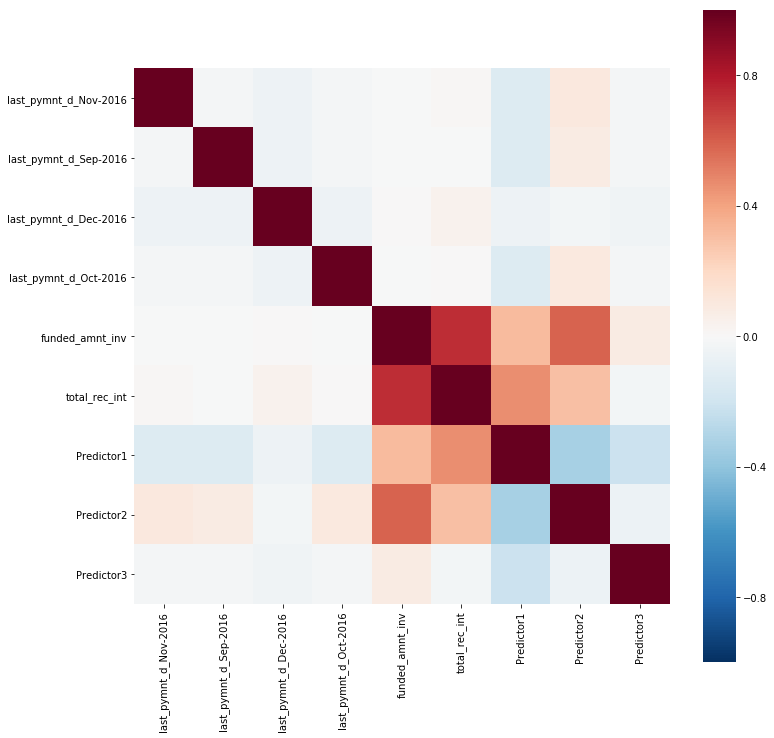

In [31]:
plt.rcParams['figure.figsize'] = 12, 12

sns.heatmap(features1.corr(), vmin=-1, vmax=1, square=True, cmap='RdBu_r')

plt.show()

In [32]:
def plotcolumn(plotterm, features1=features1):
    plt.rcParams['figure.figsize'] = 12, 8
    fig = plt.figure()

    fig.add_subplot(231)
    plt.hist(features1[plotterm])
    plt.title('{} Raw'.format(plotterm))

    fig.add_subplot(232)
    plt.hist(np.log(features1[plotterm]+1))
    plt.title('{} Log'.format(plotterm))

    fig.add_subplot(233)
    plt.hist((features1[plotterm])**2)
    plt.title('{} Square'.format(plotterm))
    
    fig.add_subplot(235)
    plt.hist(np.sqrt(features1[plotterm]+1))
    plt.title('{} Square Root'.format(plotterm))
    
    ax3=fig.add_subplot(236)
    plt.hist(1/(features1[plotterm]+1))
    plt.title('{} Inverse'.format(plotterm))
    plt.xticks(rotation=90)
    plt.show()

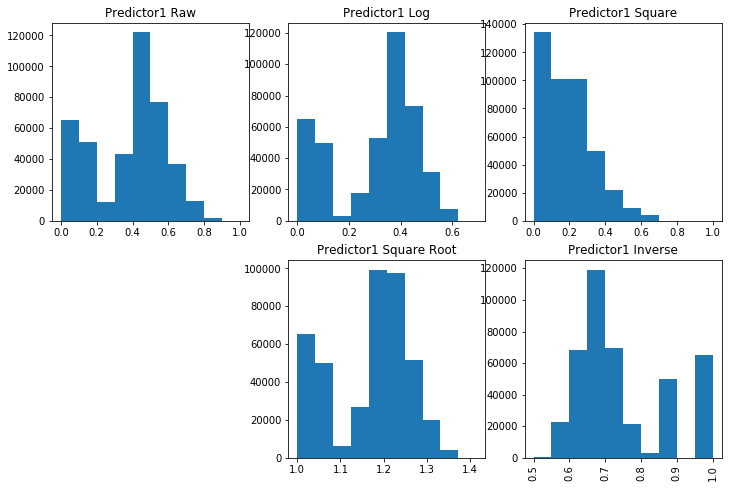

In [33]:
plotcolumn('Predictor1')

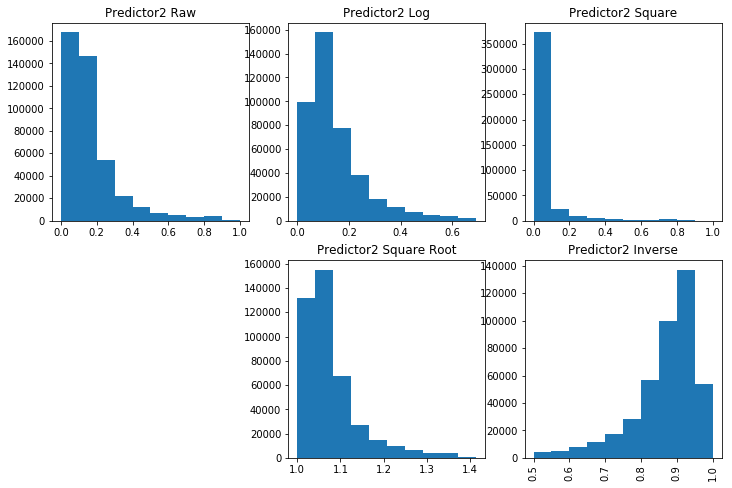

In [34]:
plotcolumn('Predictor2')

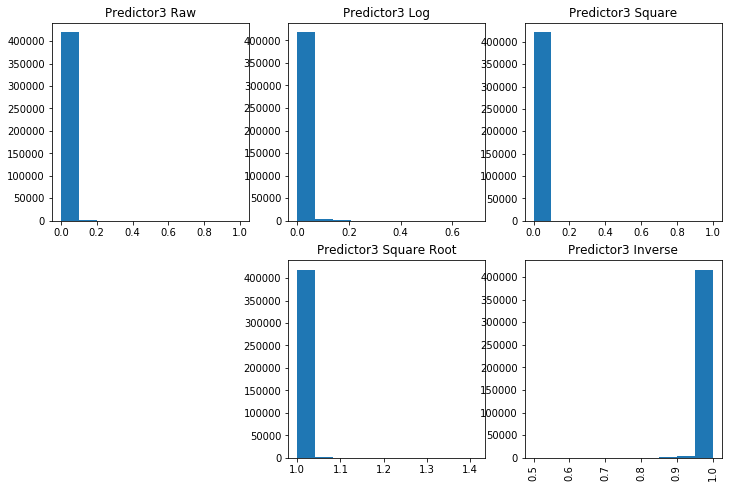

In [35]:
plotcolumn('Predictor3')

In [36]:
cvscore = cross_val_score(rfc, features1.loc[:,['Predictor1','Predictor2','Predictor3', 'last_pymnt_d_Dec-2016']], Y, cv=10)
print('Cross-Validation Score:\n', cvscore)
print('Cross-Validation Mean:\n', cvscore.mean())
print('Cross-Validation +/- (2x STD):\n', (cvscore.std()*2))

Cross-Validation Score:
 [ 0.87295481  0.91994966  0.90807627  0.92168317  0.89539302  0.92063643
  0.90833314  0.9025149   0.91533474  0.91839643]
Cross-Validation Mean:
 0.908327256647
Cross-Validation +/- (2x STD):
 0.0287598359607


In [37]:
timestep5 = time.time()
print(timestep5 - timestep4)
print(timestep5 - start)

2106.4277658462524
2501.1991078853607


In [38]:
allDone()

Cross-Validation Score:
 \[ 0.88214481  0.90871744  0.90197336  0.91294436  0.90028497  0.90619805
  0.90436724  0.89900021  0.90462393  0.89823303\]
Cross-Validation Mean:
 0.901848739946
Cross-Validation +/- (2x STD):
 0.0156862510465
 
 Cross-Validation Score:
 \[ 0.88155114  0.90843248  0.90301821  0.91256441  0.90154358  0.90738542
  0.90448598  0.9003301   0.9041727   0.89462309\]
Cross-Validation Mean:
 0.901810710663
Cross-Validation +/- (2x STD):
 0.0163601596479
 
 Cross-Validation Score:
 \[ 0.8807675   0.91002351  0.90123721  0.91349054  0.90151983  0.90778912
  0.90386853  0.89964141  0.90488517  0.89792429\]
Cross-Validation Mean:
 0.902114709912
Cross-Validation +/- (2x STD):
 0.0169164206474

Cross-Validation Score:
 \[ 0.88181235  0.90914488  0.90209209  0.91446415  0.90061743  0.90778912
  0.90496093  0.90002137  0.90481393  0.89512184\]
Cross-Validation Mean:
 0.902083810017
Cross-Validation +/- (2x STD):
 0.0169377524691

# Final Model:

The final model I have chosen has four features, three of which are averages of multicollinear variables from the filtered one-hot-endcoded dataset (after that dataset was pared down using Feature_importances_ and a threshold of 0.01). The three "Predictor" features by themselves yield a cross-validation score of about 0.89, so I added another variable back in (last_pymnt_d_Dec-2016) because it had low collinearity with other variables in the reduced feature set.